### Linear regression from scratch

In [1]:
def compute_prediction(X, weights):
    # compute prediction y_hat based on current weights
    
    predictions = np.dot(X, weights)
    return predictions

In [2]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    # update weights by one step and return the updated weights
    
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = X_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

In [3]:
def compute_cost(X, y, weights):
    # compute cost J(w)
    
    predictions = compute_prediction(X, weights)
    cost = np.mean((predictions - y) ** 2 / 2.0)
    return cost

###### put all function together with a model training function with 2 tasks:
######           1. update weight vector in each iteration
######           2. print current cost for every 100 iterations 

In [4]:
def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [5]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

###### examine the model 

In [7]:
import numpy as np
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])
y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])

In [8]:
weights = train_linear_regression(X_train, y_train, max_iter=100, learning_rate=0.01, fit_intercept=True)

5.571972628


In [9]:
X_test = np.array([[1.3], [3.5], [5.2], [2.8]])
predictions = predict(X_test, weights)

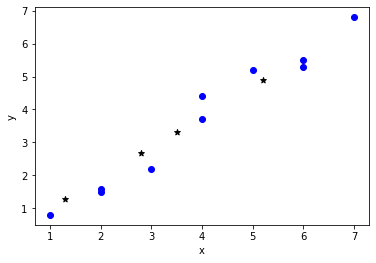

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

###### try it on another dataset

In [12]:
from sklearn.datasets import load_diabetes

In [13]:
diabetes = load_diabetes()

In [16]:
diabetes.data.shape

(442, 10)

In [17]:
num_test = 30

In [18]:
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]

In [19]:
weights = train_linear_regression(X_train, y_train, max_iter=5000, learning_rate=1, fit_intercept=True)

2960.1229914979613
1984.7462454746603
1729.7738773110927
1627.6313188621898
1572.7594881683715
1539.5508092659084
1518.613970696935
1505.18745041147
1496.4839556100546
1490.7883504050646
1487.02495657815
1484.5122232041988
1482.8149885868897
1481.653480588507
1480.8466247976992
1480.2764434158962
1479.865546786167
1479.5628140620274
1479.3342299057756
1479.1569872186708
1479.0156704666117
1478.8997716076012
1478.8020640163982
1478.7175316918754
1478.6426597055656
1478.5749609087395
1478.5126580122144
1478.454468440121
1478.399457585006
1478.346937887091
1478.296398827891
1478.2474579352602
1478.1998261818974
1478.1532833254585
1478.1076601744603
1478.062825721594
1478.0186777284687
1477.9751357796013
1477.9321361185653
1477.8896277814242
1477.8475696822725
1477.8059284029846
1477.764676507645
1477.72379125052
1477.683253581075
1477.6430473744476
1477.603158833949
1477.5635760254204
1477.5242885130954
1477.48528707389


In [20]:
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]
predictions = predict(X_test, weights)
predictions

array([232.22305668, 123.87481969, 166.12805033, 170.23901231,
       228.12868839, 154.95746522, 101.09058779,  87.33631249,
       143.68332296, 190.29353122, 198.00676871, 149.63039042,
       169.56066651, 109.01983998, 161.98477191, 133.00870377,
       260.1831988 , 101.52551082, 115.76677836, 120.7338523 ,
       219.62602446,  62.21227353, 136.29989073, 122.27908721,
        55.14492975, 191.50339388, 105.685612  , 126.25915035,
       208.99755875,  47.66517424])

In [21]:
y_test

array([261., 113., 131., 174., 257.,  55.,  84.,  42., 146., 212., 233.,
        91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,  72.,
        49.,  64.,  48., 178., 104., 132., 220.,  57.])

###### implementing linear regression with scikit-learn

In [1]:
from sklearn.linear_model import SGDRegressor

In [2]:
regressor = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', eta0=0.01, max_iter=1000)

In [3]:
regressor.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [34]:
predictions = regressor.predict(X_test)

In [35]:
predictions

array([2.26131123e+27, 2.35369539e+27, 2.64252608e+27, 2.54865846e+27,
       2.37099722e+27, 2.31699667e+27, 2.34008049e+27, 2.31069911e+27,
       2.04985550e+27, 2.08285674e+27, 2.11502610e+27, 2.12947964e+27,
       2.03704851e+27, 2.37528807e+27, 2.28027091e+27, 2.20721191e+27,
       2.03440450e+27, 2.22239643e+27, 2.10543577e+27, 2.04695411e+27,
       2.29314098e+27, 2.80130360e+27, 2.40476768e+27, 2.19294329e+27,
       2.22451208e+27, 2.02036555e+27, 1.92510347e+27, 1.71264796e+27,
       1.67362735e+27, 1.72718449e+27, 1.68582420e+27, 1.85243018e+27,
       1.94236597e+27, 1.79621907e+27, 1.81732476e+27, 1.72969657e+27,
       1.78394155e+27, 1.73982949e+27, 1.66796189e+27, 1.64532476e+27,
       1.96537283e+27, 1.81746035e+27, 1.78292489e+27, 1.64597576e+27,
       1.65876221e+27, 1.70135675e+27, 1.63612951e+27, 1.76859911e+27,
       1.81994055e+27, 1.88233943e+27, 1.79923357e+27, 3.22447123e+27,
       2.61546811e+27, 2.43562539e+27, 2.37617419e+27, 2.41357924e+27,
      

###### acquiring data (Dow Jones Industrial Average)

In [4]:
import pandas as pd
data_raw = pd.read_csv('D:/19880101_20191231.csv', index_col='Date')

In [5]:
data_raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
1988-01-04,1950.8,2030.0,1950.8,2015.3,20877900
1988-01-05,2021.4,2075.3,2021.4,2031.5,27195361
1988-01-06,2031.5,2058.2,2012.8,2037.8,18790681
1988-01-07,2037.8,2061.5,2004.6,2051.9,21377283
1988-01-08,2051.9,2058.7,1898.0,1911.3,27445517


###### generating features

###### sub function that creates features directly from the original six features

In [6]:
def add_original_features(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)    

###### sub function that generates six features related to average close prices

In [7]:
def add_avg_price(df, df_new):
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1) # 5 trading days in a week
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1) # 21 trading days in a month
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1) # 252 trading days in a year
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

###### sub function that generates six features related to average volumes 

In [8]:
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

###### Stock volatility: degree of variation of prices of a stock over time (standard deviation of close prices)

In [9]:
def add_std_price(df, df_new):
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

###### ratios of std of volumes traded over time

In [10]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

###### Return: percentage of gain/loss for a stock over a period

In [11]:
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)

In [12]:
def generate_features(df):
    df_new = pd.DataFrame()
    # 6 original features
    add_original_features(df, df_new)
    # 31 generated features
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new) 
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

###### apply avobe feature engineering strategy on downloaded DJIA data 

In [13]:
data = generate_features(data_raw) 

In [14]:
data.round(decimals=3).head(5)

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
1989-01-04,2146.6,2168.4,2144.6,2168.4,2127.1,17302883.0,2165.00,2150.624,2062.113,1.007,...,0.563,0.723,-0.011,-0.011,0.020,0.056,0.001,0.001,0.000,2177.7
1989-01-05,2177.7,2146.6,2177.7,2183.4,2146.6,15714720.0,2168.00,2154.690,2062.668,1.006,...,0.474,0.724,0.015,0.007,0.041,0.069,-0.002,0.001,0.000,2190.5
1989-01-06,2190.5,2177.7,2190.5,2205.2,2173.0,20303094.0,2172.82,2157.867,2063.218,1.007,...,0.580,0.748,0.006,0.011,0.031,0.068,0.001,0.002,0.000,2194.3
1989-01-09,2194.3,2190.5,2194.3,2213.8,2182.3,16494441.0,2175.14,2160.005,2064.341,1.007,...,0.516,0.746,0.002,0.005,0.021,0.148,0.002,0.001,0.000,2199.5
1989-01-10,2199.5,2194.3,2199.5,2209.1,2185.0,18410324.0,2181.32,2162.190,2065.351,1.009,...,0.279,0.742,0.002,0.014,0.021,0.131,0.001,0.001,0.001,2193.2


###### training set = 1988 to 2018, testing set = 2019

In [15]:
start_train = '1988-01-01'
end_train = '2018-12-31'
start_test = '2019-01-01'
end_test = '2019-12-31'
data_train = data.loc[start_train : end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
X_train.shape

(7558, 37)

In [16]:
y_train.shape

(7558,)

In [17]:
data_test = data.loc[start_test : end_test]

In [18]:
X_test = data_test.drop('close', axis=1).values
X_test.shape

(252, 37)

In [19]:
y_test = data_test['close'].values
y_test.shape

(252,)

###### normalize features

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

###### SGD-based linear regression with optimal parameters. alpha: regularization term parameter, eta0: initial learning rate

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    "alpha": [1e-4, 3e-4, 1e-3],
    "eta0": [0.01, 0.03, 0.1]
}
lr = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [0.0001, 0.0003, 0.001],
                         'eta0': [0.01, 0.03, 0.1]},
             scoring='r2')

###### select best linear regression model and predictions of testing samples

In [24]:
grid_search.best_params_

{'alpha': 0.0001, 'eta0': 0.03}

In [25]:
lr_best = grid_search.best_estimator_

In [26]:
predictions_lr = lr_best.predict(X_scaled_test)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [28]:
print(f'MSE: {mean_squared_error(y_test, predictions_lr):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_lr):.3f}')
print(f'R^2: {r2_score(y_test, predictions_lr):.3f}')

MSE: 41422.205
MAE: 154.561
R^2: 0.964


### Support vector regressor ('linear' and 'rbf' kernel)

In [29]:
from sklearn.svm import SVR

In [30]:
svr = SVR()

In [37]:
param_grid = [
    {'kernel': ['linear'], 'C': [100, 300, 500], 'epsilon': [0.00003, 0.0001]},
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [10, 100, 1000], 'epsilon': [0.00003, 0.0001]},    
]

###### Rescaled data is needed for SVR, otherwise performance is not well

In [38]:
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [100, 300, 500], 'epsilon': [3e-05, 0.0001],
                          'kernel': ['linear']},
                         {'C': [10, 100, 1000], 'epsilon': [3e-05, 0.0001],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='r2')

###### select best SVR model and make predictions

In [39]:
grid_search.best_params_

{'C': 500, 'epsilon': 0.0001, 'kernel': 'linear'}

In [40]:
svr_best = grid_search.best_estimator_

In [41]:
predictions_svr = svr_best.predict(X_scaled_test)

###### error rates

In [42]:
print(f'MSE: {mean_squared_error(y_test, predictions_svr):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_svr):.3f}')
print(f'R^2: {r2_score(y_test, predictions_svr):.3f}')

MSE: 29184.614
MAE: 121.746
R^2: 0.975


### Random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'max_depth': [30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 5]
}

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='auto', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [30, 50], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [32]:
grid_search.best_params_

{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}

In [33]:
rf_best = grid_search.best_estimator_

In [34]:
predictions_rf = rf_best.predict(X_test)

In [35]:
print(f'MSE: {mean_squared_error(y_test, predictions_rf):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_rf):.3f}')
print(f'R^2: {r2_score(y_test, predictions_rf):.3f}')

MSE: 416616.916
MAE: 420.185
R^2: 0.641


#### Plot the predictions generated by each of the 3 algorithms, along with ground truth

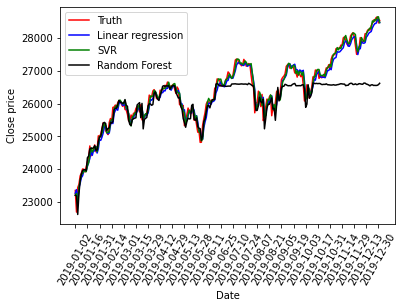

In [43]:
import matplotlib.pyplot as plt

plt.plot(data_test.index, y_test, c='r')
plt.plot(data_test.index, predictions_lr, c='b')
plt.plot(data_test.index, predictions_svr, c='g')
plt.plot(data_test.index, predictions_rf, c='k')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Linear regression', 'SVR', 'Random Forest'])
plt.show()